# Predicting Hotel Booking Cancellations
## Cleaning and EDA

In this project, I'll use a hotel occupancy dataset. After data cleaning and exploratory analysis, I'll build predictive models with Logistic Regression, Random Forest, Decision Tree, KNN, and Naive Bayes to determine whether a booking will be canceled or not. By comparing their accuracy, I'll identify the most effective model for this prediction task.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import data

In [2]:
df = pd.read_csv("./Datasets/hotel_bookings.csv")
display(df.head(), df.shape)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


(119390, 32)

## Data Cleaning

In [3]:
# Check missing/null data
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Dealing with 'Agent', 'Company', 'Country' and 'Children' null values

In [4]:
# Drop 'Agent' and 'Company' as they hold to many NaN values.
df.drop(['agent', 'company'], axis=1,inplace=True)

In [5]:
# For 'Country' column, check the most frequent value to fill NaN values.
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [6]:
# The most frequent value for 'Country'
df['country'].value_counts().index[0]

'PRT'

In [7]:
# Fill 'Country' NaN values with the most frequent 'Country'
df['country'].fillna(df['country'].value_counts().index[0], inplace=True)

In [8]:
# The most frequent value for 'Children'
df['children'].value_counts().index[0]

0.0

In [9]:
# Fill extra NaN with 0
df.fillna(0, inplace=True)

In [10]:
# Check if there are any remaining NaN values
print('Missing values in our df: ', df.isnull().sum().sum())

Missing values in our df:  0


Dealing with bookings where amount of 'Adults', 'Children' and 'Babies' is 0

In [11]:
filter_no_one = (df['children']==0) & (df['adults']==0) & (df['babies']==0)

display(df[filter_no_one][['children', 'adults', 'babies']])

print("There are ", len(df[filter_no_one][['children', 'adults', 'babies']]), " bookings with no person included.")

,children,adults,babies
2224,0.0,0,0
2409,0.0,0,0
3181,0.0,0,0
3684,0.0,0,0
3708,0.0,0,0
...,...,...,...
115029,0.0,0,0
115091,0.0,0,0
116251,0.0,0,0
116534,0.0,0,0


There are  180  bookings with no person included.


In [12]:
# Drop rows (bookings) with no person included and save it to a new dataframe
data = df[~filter_no_one]
print('Original data shape: ', df.shape)
print('New data shape: ', data.shape)

Original data shape:  (119390, 30)
New data shape:  (119210, 30)


## Exploratory Data Analysis

### Analyse Demand of Hotels


- Where do the guests come from?

In [13]:
data['is_canceled'].unique()

array([0, 1])

0 means 'not canceled', 1 means 'canceled'

In [14]:
# Select 'not canceled' booking
data2 = data[data['is_canceled']==0]
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [15]:
# Calculate the percentage and total count of customers from each country

# Total bookings 'not canceled'
len_not_canceled = len(data2)

# Get % of customers of each country
country_perc_data = round((data2['country'].value_counts()/len_not_canceled*100),2).reset_index()

# Count the number of customers from each country
country_num_data = data2['country'].value_counts().reset_index()

# Column names
country_perc_data.columns=['country', '%_of_customers']
country_num_data.columns=['country','no_of_guests']

# Merge both dataframes based on 'country'
country_data = pd.merge(country_perc_data, country_num_data, on='country')

# Top 10 country visitors
country_data[:10]

,country,%_of_customers,no_of_guests
0,PRT,28.53,21398
1,GBR,12.89,9668
2,FRA,11.29,8468
3,ESP,8.51,6383
4,DEU,8.09,6067
5,IRL,3.39,2542
6,ITA,3.24,2428
7,BEL,2.49,1868
8,NLD,2.29,1716
9,USA,2.12,1592


### Visualizing Guests' Home Countries

In [16]:
# pip install plotly
# pip install chart_studio

import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [17]:
import plotly.express as px

In [18]:
map_guest = px.choropleth(country_num_data,
                          locations=country_num_data['country'],
                          color=country_num_data['no_of_guests'],
                          hover_name = country_num_data['country'],
                          title= 'home country of guests')

map_guest.show()

[Click here to view the interactive notebook ("map_guest") on nbviewer](https://nbviewer.jupyter.org/github/alleida23/predicting_hotel_booking_cancellations/blob/main/predicting_hotel_booking_cancellations.ipynb)


### Analyse Price of Hotel across year

How much do guests pay for a room per night?

- Avg/Mean (if there is no presence of outliers) Vs Median

- Quantiles (q1 to 25h, 50th = Median, q3 to 75th) --> boxplot

In [19]:
# Not canceled bookings
data2[['hotel','reserved_room_type','adr']].head()

,hotel,reserved_room_type,adr
0,Resort Hotel,C,0.0
1,Resort Hotel,C,0.0
2,Resort Hotel,A,75.0
3,Resort Hotel,A,75.0
4,Resort Hotel,A,98.0


In [20]:
display(data2['hotel'].unique(), data2['reserved_room_type'].unique())

array(['Resort Hotel', 'City Hotel'], dtype=object)

array(['C', 'A', 'D', 'G', 'E', 'F', 'H', 'L', 'B'], dtype=object)

Text(0, 0.5, 'price (EUR)')

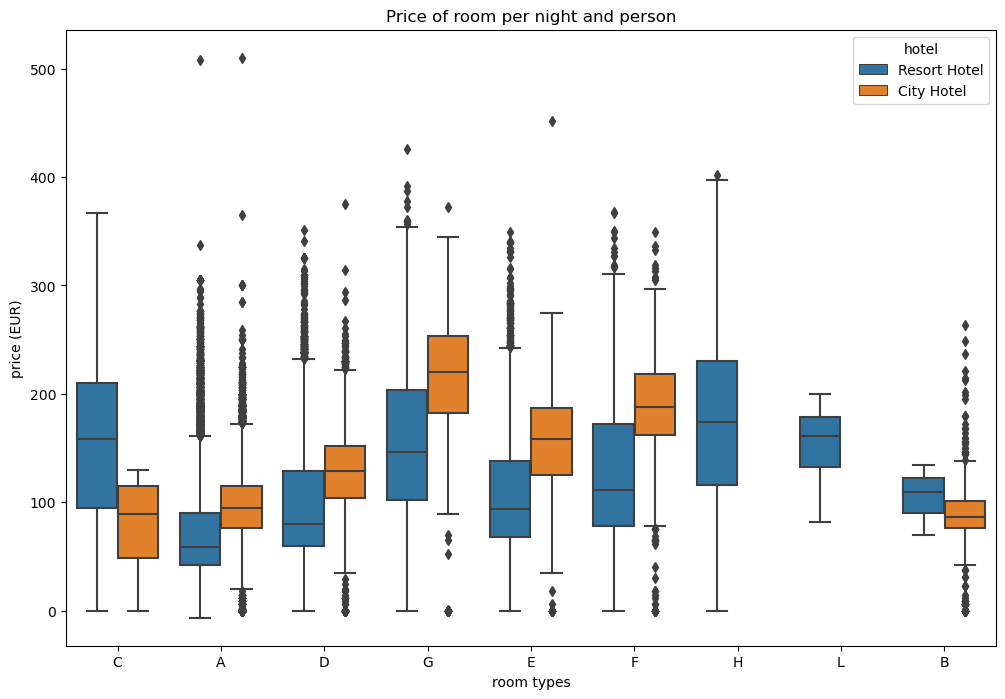

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr', hue='hotel',data=data2)
plt.title('Price of room per night and person')
plt.xlabel('room types')
plt.ylabel('price (EUR)')

In [22]:
# Upper dots = positive-high outliers
# Bottom dots = low outliers
# Line innside the box = Median or Q2
# Bottom box line = Q1
# Bottom top line = Q3
# Upper & Down Fence -- aprox 90th and 10th data

In [23]:
# Find the maximum median 'adr' for each 'hotel' and 'reserved_room_type'
median_max_df = data2.groupby(['hotel', 'reserved_room_type'])['adr'].median().reset_index()
max_median_rows = median_max_df.loc[median_max_df.groupby('hotel')['adr'].idxmax()]

# Output display text
output_text = ""
for _, row in max_median_rows.iterrows():
    output_text += f"For {row['hotel']}, the highest adr median is {row['adr']} and corresponds to {row['reserved_room_type']} room type.\n"

print(output_text)

For City Hotel, the highest adr median is 220.0 and corresponds to G room type.
For Resort Hotel, the highest adr median is 174.0 and corresponds to H room type.



### Analyse Demand of Hotels
- Which are the most busy months for each Hotel?

In [24]:
data2['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [25]:
# Distinct dfs for Resort and City hotel
data_resort= data2[(data2['hotel']=='Resort Hotel')]
data_city= data2[(data2['hotel']=='City Hotel')]

In [26]:
print('Resort Hotel data shape: ', data_resort.shape)
print('City Hotel data shape: ', data_city.shape)

Resort Hotel data shape:  (28927, 30)
City Hotel data shape:  (46084, 30)


In [27]:
# Resort Hotel
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month', 'no_of_guests']

# City Hotel
rush_city = data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month', 'no_of_guests']

# Merge both dataframes
final_rush = rush_resort.merge(rush_city, on='month')
final_rush.columns=['month', 'guests_resort', 'guests_city']
final_rush

,month,guests_resort,guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [28]:
# pip install sorted-months-weekdays
# pip install sort_dataframeby_monthorweek

import sort_dataframeby_monthorweek as sd

# Sort by proper order of months
final_rush = sd.Sort_Dataframeby_Month(final_rush, 'month')
final_rush

,month,guests_resort,guests_city
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [29]:
final_rush.columns

Index(['month', 'guests_resort', 'guests_city'], dtype='object')

In [30]:
px.line(data_frame=final_rush,
       x='month',
       y=['guests_resort', 'guests_city'],
       title = 'Number of guests by month')

In [31]:
# Find the three top and three worst months for each hotel
top_months_resort = final_rush.nlargest(3, 'guests_resort')['month'].tolist()
worst_months_resort = final_rush.nsmallest(3, 'guests_resort')['month'].tolist()

top_months_city = final_rush.nlargest(3, 'guests_city')['month'].tolist()
worst_months_city = final_rush.nsmallest(3, 'guests_city')['month'].tolist()

# Generate the text output
def generate_text(hotel_type, top_months, worst_months):
    top_months_text = ", ".join(top_months)
    worst_months_text = ", ".join(worst_months)
    text = f"For the {hotel_type} Hotel, the top 3 months with the most guests are: {top_months_text}. The worst 3 months with the least guests are: {worst_months_text}."
    return text

resort_text = generate_text("Resort", top_months_resort, worst_months_resort)
city_text = generate_text("City", top_months_city, worst_months_city)

print(resort_text)
print(city_text)


For the Resort Hotel, the top 3 months with the most guests are: August, July, October. The worst 3 months with the least guests are: January, November, December.
For the City Hotel, the top 3 months with the most guests are: August, July, May. The worst 3 months with the least guests are: January, December, November.


### Which month has the highest avg daily rate (adr)?

In [32]:
data = sd.Sort_Dataframeby_Month(data, 'arrival_date_month')

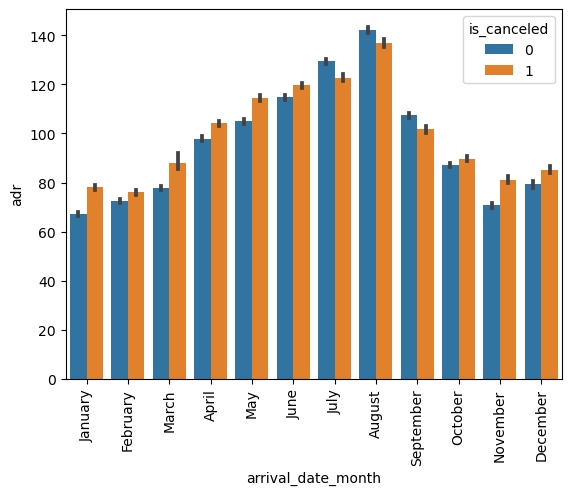

In [33]:
sns.barplot(x='arrival_date_month', y='adr', data=data, hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

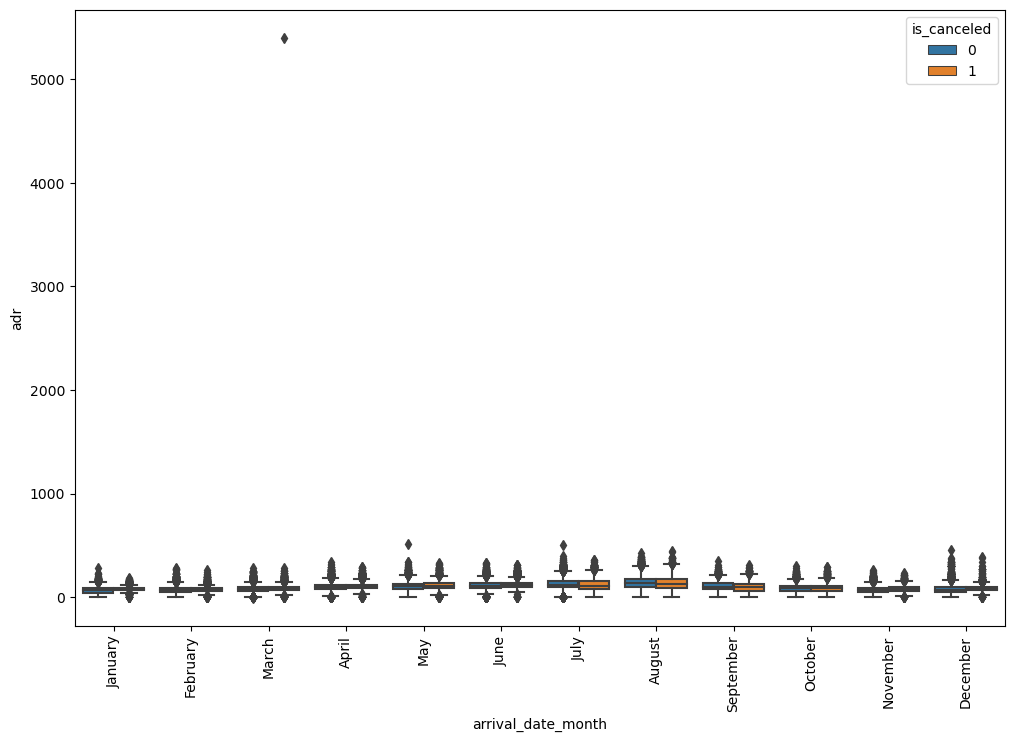

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(x='arrival_date_month', y='adr', data=data, hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

As there is an extreme outlier, let's limit the plot

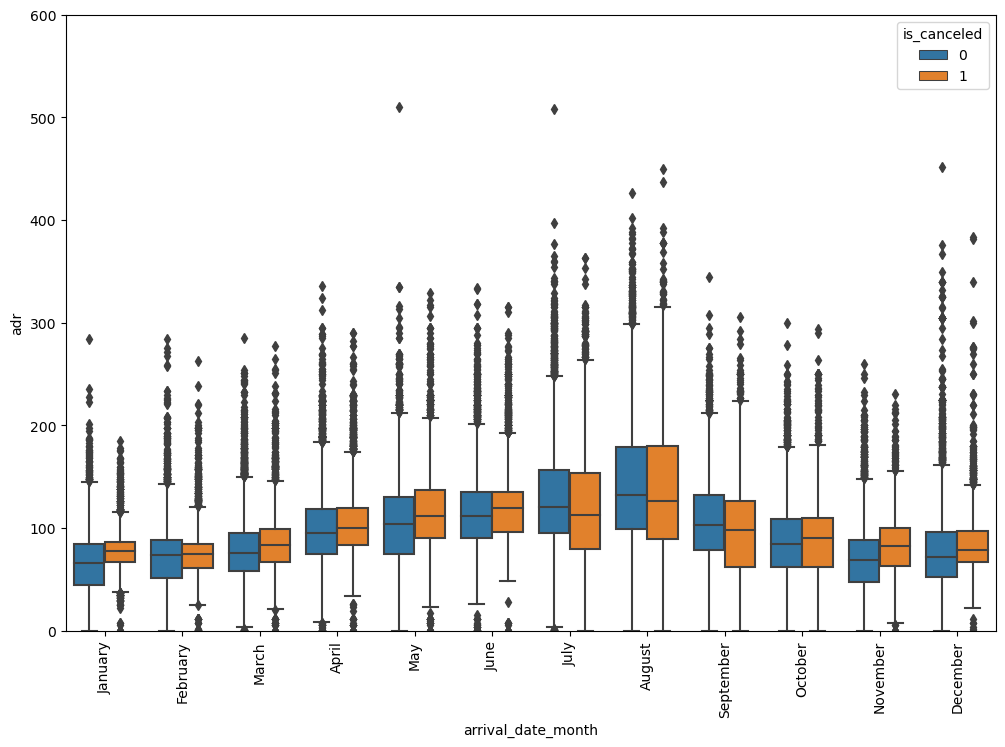

In [125]:
plt.figure(figsize=(12,8))
sns.boxplot(x='arrival_date_month', y='adr', data=data, hue='is_canceled')
plt.xticks(rotation='vertical')
plt.ylim(0,600) # new limit
plt.show()

### More Analysis

Analyse wether bookings were made only for weekdays or for weekends or for both?

In [36]:
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Examples:
- 16436 guests have stayed 1 weeknight and 0 weekend nights.
- 6531 guests have stayed 1 weeknight and 2 weekend nights.

But what about the first cell 645 guests (0 nights) ?

In [37]:
def week_function(row):
    feature1 = 'stays_in_weekend_nights'
    feature2 = 'stays_in_week_nights'
    
    if row[feature2]== 0 and row[feature1] >0:
        return 'stay_just_weekend'
    
    elif row[feature2] >0 and row[feature1]== 0:
        return 'stay_just_weekdays'
    
    elif row[feature2] >0 and row[feature1] >0:
        return 'stay_both_weekdays_weekends'
        
    else:
        return 'undefined_data'

In [38]:
data2['weekend_or_weekday']=data2.apply(week_function, axis=1)
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,stay_just_weekdays


In [39]:
data2['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekends    37551
stay_just_weekdays             31788
stay_just_weekend               5050
undefined_data                   622
Name: weekend_or_weekday, dtype: int64

In [40]:
data2 = sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [41]:
# Won't be sorted as it's not a df
data2.groupby(['arrival_date_month', 'weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    3627
                    stay_just_weekdays             2559
                    stay_just_weekend               344
                    undefined_data                   30
August              stay_both_weekdays_weekends    4929
                    stay_just_weekdays             3137
                    stay_just_weekend               509
                    undefined_data                   49
December            stay_both_weekdays_weekends    1901
                    stay_just_weekdays             2123
                    stay_just_weekend               298
                    undefined_data                   69
February            stay_both_weekdays_weekends    2438
                    stay_just_weekdays             2514
                    stay_just_weekend               360
                    undefined_data                   47
January             stay_both_weekdays_weekends    1550


In [42]:
group_data = data2.groupby(['arrival_date_month', 'weekend_or_weekday']).size().unstack().reset_index()

In [43]:
sorted_data = sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')
sorted_data

,arrival_date_month,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
0,January,1550,2125,393,47
1,February,2438,2514,360,47
2,March,3151,3060,359,50
3,April,3627,2559,344,30
4,May,3442,3017,570,74
5,June,3241,2685,433,36
6,July,4570,2818,462,57
7,August,4929,3137,509,49
8,September,3192,2692,479,22
9,October,3393,2844,582,82


In [44]:
sorted_data.set_index('arrival_date_month', inplace=True)
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<AxesSubplot:xlabel='arrival_date_month'>

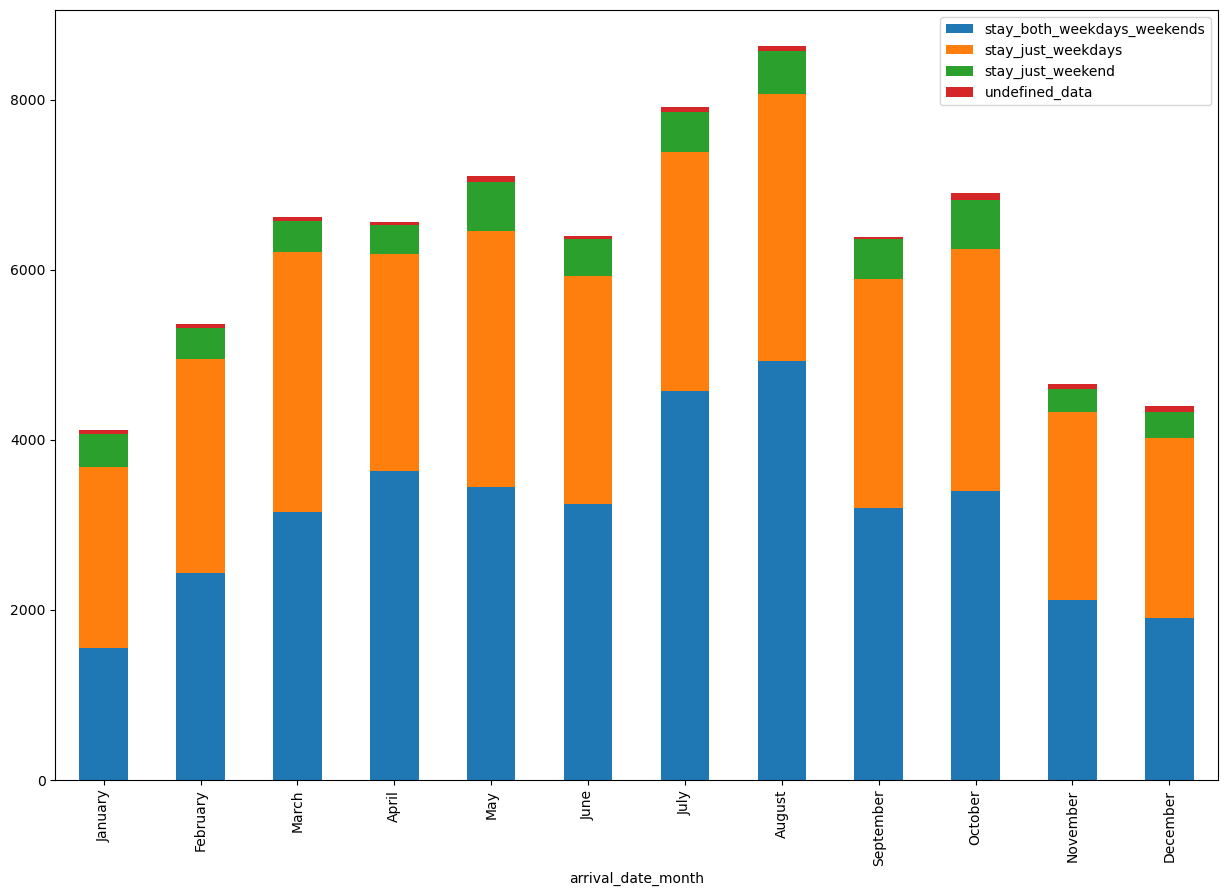

In [45]:
sorted_data.plot(kind='bar', stacked=True, figsize=(15,10))

### Features for Machine Learning models

Creating / reduce features to improve our models

In [46]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

Example: "family": "adults" & ("children" or "babies")

In [47]:
def family(row):
    
    if(row['adults']>0)& (row['children']>0 or row['babies']>0):
        return 1 #if this condition is true: is family
    else:
        return 0

In [48]:
data['is_family'] = data.apply(family, axis=1)

In [49]:
data['total_customers'] = data['adults'] + data['children'] + data['babies']

In [50]:
data['total_nights'] = data['stays_in_week_nights'] + data['stays_in_week_nights']

In [51]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customers,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,2
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,2
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,2


"Deposit_type": if refundable deposit won't exist

In [52]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [53]:
# Dictionary approach
dict1={'No Deposit': 0, 'Non Refund': 1, 'Refundable': 0}

In [54]:
# Map the dictionary
data['deposit_given'] = data['deposit_type'].map(dict1)

data['deposit_given']

0         0
1         0
2         0
3         0
4         0
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: deposit_given, Length: 119210, dtype: int64

In [55]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customers', 'total_nights', 'deposit_given'],
      dtype='object')

In [56]:
# Drop columns
data.drop(['adults', 'children', 'babies','deposit_type'], axis=1, inplace=True)

In [57]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customers',
       'total_nights', 'deposit_given'],
      dtype='object')

In [58]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customers,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,2,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,2,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,BB,...,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,2,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,HB,...,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,4,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,BB,...,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,4,0


### Encoding categorical data

Mean encoding: 

In [59]:
# List comprehension to get categorical columns
cate_features =[col for col in data.columns if data[col].dtype == 'object']

cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [60]:
data_cat = data[cate_features]
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015


In [61]:
# List comprehension to get numerical columns
num_features =[col for col in data.columns if data[col].dtype != 'object']

data[num_features].head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,2,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,2,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,2,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,4,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,4,0


In [62]:
data.groupby(['hotel'])['is_canceled'].mean()

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: is_canceled, dtype: float64

Mean encoding:

For each hotel, if mean < 0.5 means there are more 0 than 1:

- City Hotel = count(1) < count(0)
- Resort Hotel = count(1) < count(0)

Now we can replace values for each corresponding mean.

In [63]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [64]:
data_cat['cancellation'] = data['is_canceled']

In [65]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,1


In [66]:
cols=data_cat.columns
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation'],
      dtype='object')

In [67]:
# Get all columns but 'cancellation'
cols=cols[0:-1]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [68]:
# Apply Mean Encoding (using own code instead of packages)
for col in cols:
    dict2 = data_cat.groupby([col])['cancellation'].mean().to_dict() # newdict
    data_cat[col]= data_cat[col].map(dict2)

In [69]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,0.101010,1
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.407864,0.0,0.108247,0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.407864,1.0,0.684211,1


### Handle Outliers

In [70]:
data[num_features].head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,2,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,2,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,2,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,4,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,4,0


In [71]:
# Merge cat & num dfs
dataframe = pd.concat([data_cat, data[num_features]], axis=1)
dataframe

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,59.94,0,1,0,2.0,2,0
1,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,116.10,1,1,1,4.0,2,0
2,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.318108,0.251373,0.407864,1.0,...,0,0,0,89.00,0,1,0,2.0,2,0
3,0.277674,0.305016,0.344653,0.252336,0.367590,0.410598,0.391567,0.251373,0.407864,0.0,...,0,0,0,73.46,0,2,0,2.0,4,0
4,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.364723,0.306002,0.407864,1.0,...,0,0,0,119.00,0,0,1,4.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0.417859,0.350348,0.374106,0.373537,0.153712,0.174868,0.292683,0.247134,0.407864,0.0,...,0,4,0,117.82,0,1,1,3.0,16,0
119206,0.417859,0.350348,0.374064,0.185848,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,...,0,0,0,90.34,0,1,0,2.0,10,0
119207,0.417859,0.350348,0.374106,0.185848,0.343313,0.410598,0.391567,0.237233,0.407864,0.0,...,0,0,0,103.57,0,0,0,2.0,10,0
119208,0.417859,0.350348,0.374064,0.167193,0.367590,0.410598,0.391567,0.445055,0.254504,0.0,...,0,2,0,68.57,0,2,0,2.0,20,0


In [72]:
# Remove duplicate info: 'is_canceled' and 'cancellations'
dataframe.drop(['cancellation'], axis=1, inplace=True)
dataframe.shape

(119210, 30)

In [73]:
# Normal Distribution / Gaussian --> Best for ML
# Left/Right skeweness --> low/high outliers --> logtransformation

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

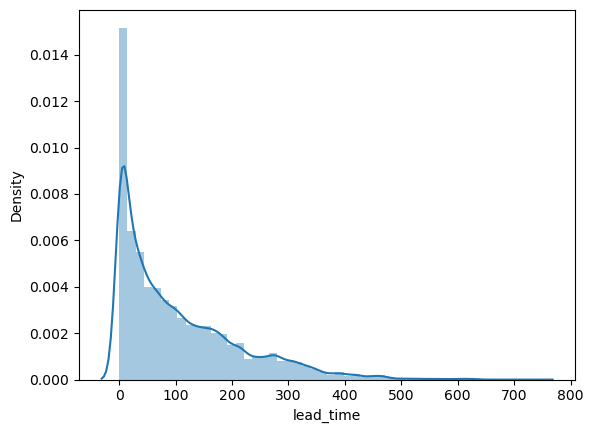

In [74]:
sns.distplot(dataframe['lead_time'])

In [75]:
#log1p (issue with negative values)
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [76]:
handle_outlier('lead_time')

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

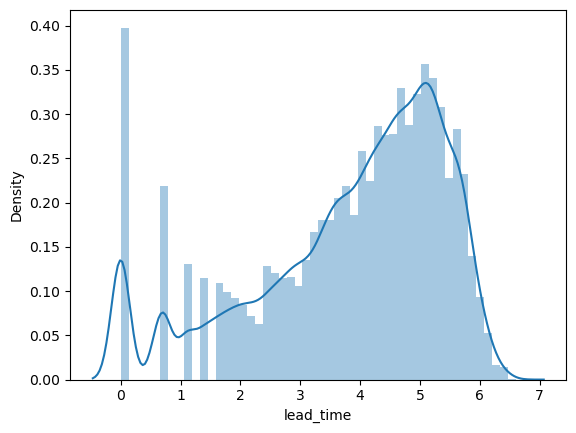

In [77]:
sns.distplot(dataframe['lead_time'])

<AxesSubplot:xlabel='adr', ylabel='Density'>

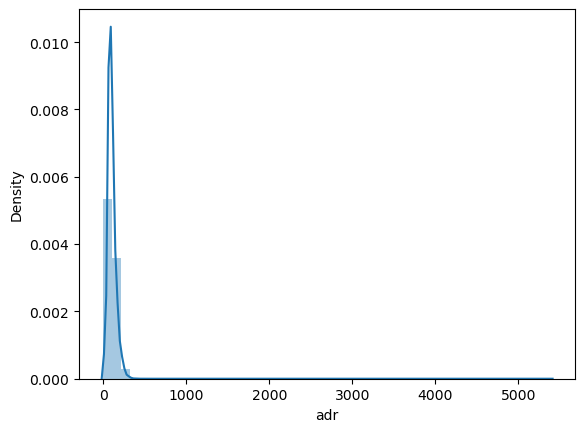

In [78]:
# ADR
sns.distplot(dataframe['adr'])

In [79]:
# Filter: negative values (adr)
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,...,2,2,0,-6.38,0,0,0,2.0,12,0


In [80]:
# Apply function
handle_outlier('adr')

In [81]:
# 1 missing value: negative value cannot be handled by a log operation.
dataframe['adr'].isnull().sum()

1

<AxesSubplot:xlabel='adr', ylabel='Density'>

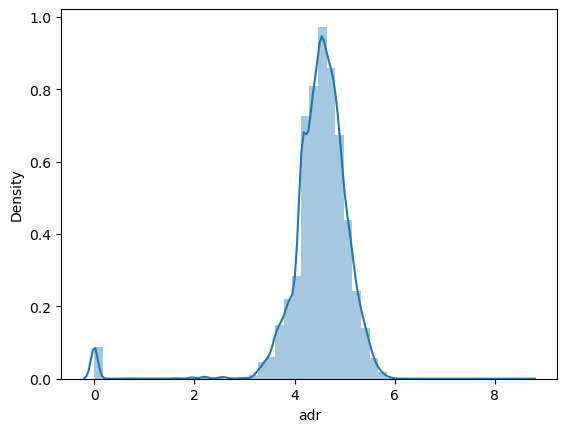

In [82]:
# Plot and drop negative value
sns.distplot(dataframe['adr'].dropna())

### Important features using co-relation & univariate analysis

Univariate Distribution Example:
    
For 'lead_time':

    - find distribution when 'is_canceled' == 0
    - find distribution when 'is_canceled' == 1
    
Rule of thumb: the less overlapping between both distributions, the better for ML.

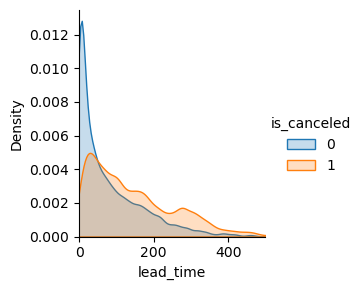

In [83]:
sns.FacetGrid(data, hue='is_canceled', xlim=(0,500)).map(sns.kdeplot, 'lead_time',shade=True).add_legend()

sns.FacetGrid(data, hue='is_canceled', xlim=(0, 500)):

    - data: The input DataFrame or data source.
    - hue: Categorical variable in the data that will be used for color-mapping. In this case, it is used to distinguish between different levels of the 'is_canceled' variable.
    - xlim: A tuple specifying the limits of the x-axis in the plot. It sets the minimum and maximum values displayed on the x-axis, in this case, from 0 to 500.


.map(sns.kdeplot, 'lead_time', shade=True):

    - .map(): This function is used to apply the sns.kdeplot function to the data in the FacetGrid.
    - sns.kdeplot: This is the kernel density estimation plot function, which estimates the probability density function of a continuous random variable (in this case, 'lead_time').
    - 'lead_time': The column name in the data DataFrame that will be plotted on the x-axis.
    - shade=True: This parameter enables shading under the KDE curve, creating a filled area that helps visualize the distribution better.
    - .add_legend(): This function adds a legend to the plot, which helps interpret the different hues (colors) used to represent the levels of the 'is_canceled' variable.



So, the code creates a FacetGrid plot using seaborn, where the 'lead_time' column from the data DataFrame is represented by a kernel density estimation plot. The plot is colored based on the 'is_canceled' variable. The x-axis limits are set from 0 to 500, and the KDE curve is shaded. Finally, a legend is added to explain the colors used for different cancellation levels.

Up to some extent, this feature will play an important role.

Important features using correlation

In [84]:
corr = dataframe.corr()
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,...,-0.004467,-0.076598,0.072725,0.154041,-0.218961,-0.043478,-0.058094,-0.038762,-0.235955,0.172415
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,...,-0.021971,-0.011049,0.029164,0.228179,-0.021910,0.002763,0.020491,0.079090,0.036681,0.057361
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,...,0.011109,-0.027189,-0.031562,-0.019908,0.003455,0.006875,0.001466,-0.003447,-0.053540,0.047597
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,...,0.091795,-0.061513,0.067054,-0.160520,0.007613,-0.200822,-0.044139,-0.117351,-0.138467,0.395685
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,...,-0.117519,-0.057578,0.096385,-0.004009,-0.145726,-0.155463,-0.104584,-0.023874,-0.006660,0.397229
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,...,-0.142650,-0.118461,0.048001,0.126516,-0.146562,0.075047,-0.026278,0.087776,0.072280,0.115160
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,...,0.022533,-0.040134,0.068336,-0.185932,-0.093401,-0.161406,-0.133748,-0.246347,-0.175821,0.201923
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,...,-0.003205,-0.096277,0.067129,-0.038347,-0.131035,-0.135337,-0.179356,-0.229081,-0.095544,0.263383
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,...,0.024716,-0.095486,-0.101833,0.117592,0.061786,0.137114,0.106618,0.124318,0.031095,0.121789
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,...,-0.057365,-0.144832,0.054301,0.081660,-0.195701,-0.234877,-0.013226,0.044826,0.025542,0.481507


In [85]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_given                     0.481507
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customers                   0.044826
stays_in_week_nights              0.025542
total_nights                      0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_dat

Whenever 2 features have a high correlation (close to 1 or -1) we must drop those to avoid overfitting. Same with those who have 0 correlation.

    - reservation_status: 1.000
    - arrival_date_year: 0.016
    - arrival_date_week_number: 0.008
    - stays_in_weekend_nights: -0.001
    - arrival_date_day_of_month: -0.005
    
As long as we drop 'reservation_status', we can also drop 'reservation_status_date'.

'is_canceled' will be our target feature.

In [86]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_given', 'country', 'lead_time', 'market_segment',
       'assigned_room_type', 'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customers',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [87]:
features_to_drop = ['reservation_status', 'reservation_status_date',
                    'arrival_date_year', 'arrival_date_week_number',
                    'stays_in_weekend_nights','arrival_date_day_of_month']

In [88]:
dataframe.drop(features_to_drop, axis=1, inplace=True)

In [89]:
# 24 features
dataframe.shape

(119210, 24)

### Techniques of Feature Importance (for model building)

Feature selection

In [90]:
dataframe.head(2)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,is_canceled,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0,...,0,0,0,4.109890,0,1,0,2.0,2,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0,...,0,0,0,4.763028,1,1,1,4.0,2,0


In [91]:
# Check null values first
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customers                   0
total_nights                      0
deposit_given                     0
dtype: int64

In [92]:
# Drop null values
dataframe.dropna(inplace=True)

In [93]:
# Drop target feature
x = dataframe.drop('is_canceled', axis=1) # do not update, 'inplace=True'

In [94]:
y= dataframe['is_canceled']

In [95]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [96]:
# Initialize Lasso
## Lasso(alpha=0.005)
# penalty paramater (the bigger the alpha value, the less features this model will select)

In [97]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005))

In [98]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [99]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

    - False = not selected
    - True = selected

In [100]:
cols = x.columns
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'lead_time', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customers',
       'total_nights', 'deposit_given'],
      dtype='object')

In [101]:
# Filter: selected features
selected_feature = cols[feature_sel_model.get_support()]
selected_feature

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customers', 'total_nights',
       'deposit_given'],
      dtype='object')

In [102]:
x = x[selected_feature]
x

,country,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customers,total_nights,deposit_given
0,0.379365,4.700480,0,0,0,0,4.109890,0,1,2.0,2,0
1,0.379365,4.700480,0,0,0,0,4.763028,1,1,4.0,2,0
2,0.562958,1.098612,0,0,0,0,4.499810,0,1,2.0,2,0
3,0.252336,4.488636,0,0,0,0,4.310262,0,2,2.0,4,0
4,0.562958,3.044522,0,0,0,0,4.787492,0,0,4.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0.373537,5.159055,0,0,4,0,4.777610,0,1,3.0,16,0
119206,0.185848,2.890372,0,0,0,0,4.514589,0,1,2.0,10,0
119207,0.185848,4.682131,0,0,0,0,4.649857,0,0,2.0,10,0
119208,0.167193,5.739793,0,0,2,0,4.242333,0,2,2.0,20,0


In [103]:
# Those features from X will be the ones used to predict 'is_canceled' (y)
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119209, dtype: int64

### Building Machine Learning Model: Logistic Regression

Regression, **Classification**, Clustering model


For Classification cases:

    - Logistic Regression
    - Random Forest
    - Decision Tree
    - KNN
    - Boosting

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [106]:
X_train.shape

(89406, 12)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
# Initialize Logistic Regression Model
logreg=LogisticRegression()

In [109]:
# Fit the model with train data
logreg.fit(X_train, y_train)

LogisticRegression()

In [110]:
# Predict array
pred=logreg.predict(X_test)
pred

array([0, 0, 1, ..., 0, 0, 0])

#### Evaluate: Confusion Matrix, Accuracy Score, Classification Report...

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [112]:
# Confusion Matrix
confusion_matrix(y_test, pred)

array([[17377,  1324],
       [ 4640,  6462]])

    - Top Left: True Positive
    - Top Right: False Positive
    - Bottom Left: False Negative
    - Bottom Right: True Negative

In [113]:
# Accuracy score
acsc= accuracy_score(y_test, pred)
print('Accuracy score: ', round(acsc,3))

Accuracy score:  0.8


### Cross Validation

Cross validation increases accuracy (Kfold, GridSearch, RandomizedSearch, Genetic Algo...)

Example (specific random_state?):
    
    - Cross Validation (CV) = 5
        - CV of data 5 times, imagine 1000 records;
            - 1 CV (last 20% of data as test / rest 80% train)
            - 2 CV (data from 60 to 80% as test / 0 to 60 and 80 to 100% as train)
            - 3 CV (data from 40 to 60% as test / 0 to 40 and 60 to 100% as train)
            - 4 CV (data from 20 to 40 as test / 0 to 20 and 40 to 100% as train)
            - 5 CV (first 20% of data as test / rest 80% train)

Accuracy: 
    - Mean of {1 CV, 2 CV... 5 CV} --> final accuracy --> Cross Validate

ML Algorithm (both reg/class). Ex Random Forest Regressor/Classifier.

Parameters (default):

    - n_estimators
    - max_features
    - max_depth
    
How to optimize our hyperparameters / model?

GridSearchCV:

    - Define Dict:
        'n_estimatators' = [100, 200, 300]
        'max_features' = ['auto', log2, sqrt]
        'max_depth' = [.   ]
        
    - Then pass the Dict to GridSearchCH()
        - It will perfom every and each combination determined in the Dict
        - It will return the best model / parameters (highest accuracy)
        
 RandomizedSearchCV:
 
     - It will pick random parameters and check which has higher accuracy

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
score = cross_val_score(logreg, x, y, cv=10)
score

array([0.77510276, 0.78776948, 0.78256858, 0.81486452, 0.81419344,
       0.73634762, 0.74515561, 0.85412298, 0.83424209, 0.80444631])

In [116]:
score.mean()

0.7948813392023213

Decision Tree:

    - From the decision tree, which feature will be selected as the main "road"
    - Entropy, Information Gain
    - Gini (?) Index, Impurity
    - Pre-prunny & Post --> if overfitting, high accuracy in Train data, low in Test Data
 
Entropy:

    - How random the data is?
    - Probability of occurence
    - Impurity
    
Information gain:

    - Based on entropy, which feature will provide the highest info gain (parent node)?
    
Gini (Impurity) Index:

    - ...

### Applying multiple algorithms and check on accuracy

In [117]:
score.mean()

0.7948813392023213

In [118]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [119]:
models = []
models.append(('Logistic Regression', LogisticRegression()))  # 2nd to initialize
models.append(('Naive bayes', GaussianNB()))  
models.append(('Random Forest', RandomForestClassifier()))  
models.append(('Decision Tree', DecisionTreeClassifier())) 
models.append(('KNN', KNeighborsClassifier()))

In [120]:
models

[('Logistic Regression', LogisticRegression()),
 ('Naive bayes', GaussianNB()),
 ('Random Forest', RandomForestClassifier()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier())]

In [121]:
for name, model in models:
    print(name)
    model.fit(X_train, y_train) # fit models
    
    predictions = model.predict(X_test) # prediciton
    
    from sklearn.metrics import confusion_matrix, accuracy_score
    print(confusion_matrix(predictions, y_test))
    print('\n')
    print(accuracy_score(predictions, y_test))
    print('\n')

Logistic Regression
[[17377  4640]
 [ 1324  6462]]


0.7998859175250813


Naive bayes
[[ 6516   639]
 [12185 10463]]


0.5697077475421938


Random Forest
[[17097  2701]
 [ 1604  8401]]


0.8555514545515552


Decision Tree
[[16014  2674]
 [ 2687  8428]]


0.8201187799885917


KNN
[[16721  3312]
 [ 1980  7790]]


0.8224339831560581




In [123]:
# Convert to a dataframe

results = []

for name, model in models:
    model.fit(X_train, y_train)  # fit model
    predictions = model.predict(X_test)  # prediction
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    accuracy = accuracy_score(y_test, predictions)

    results.append([name, tp, fp, fn, tn, accuracy])

# Creating a DataFrame from the results list
columns = ['Model', 'True Positive', 'False Positive', 'False Negative', 'True Negative', 'Accuracy Score']
results_df = pd.DataFrame(results, columns=columns)

# Find the row with the highest accuracy
highest_accuracy_row = results_df.loc[results_df['Accuracy Score'].idxmax()]

# Apply styling to highlight the row with the highest accuracy
highlighted_results_df = results_df.style.apply(lambda row: ['background: purple' if row.equals(highest_accuracy_row) else '' for v in row], axis=1)

highlighted_results_df

,Model,True Positive,False Positive,False Negative,True Negative,Accuracy Score
0,Logistic Regression,6462,1324,4640,17377,0.799886
1,Naive bayes,10463,12185,639,6516,0.569708
2,Random Forest,8407,1643,2695,17058,0.854444
3,Decision Tree,8419,2717,2683,15984,0.818810
4,KNN,7790,1980,3312,16721,0.822434
